### *Heart Stoke Prediction*
**Heart Stoke Prediction** - Data-Driven Health Decisions

### *Tools Used* 
Python, Pandas, Matplotlib, Seaborn.

### *Description*
This project aims to help a healthcare provider identify individuals at high risk of stroke using patient data. The goal is to uncover key medical and lifestyle risk factors and support decision-making through actionable insights and visualizations.

### *Business Problem*
A healthcare provider wants to improve patient care by clearly identifying individuals at high risk of strokes. By using patient data (age, hypertension, heart disease, BMI, etc.), they want to predict the likelihood of a stroke and visualize the risk segments across different demographics and regions using Python for data analysis and Power BI for business reporting and decision-making.

- *Author* - *Niranjan (Data Analyst)*

### *Environmental Setup*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### *Data Loading*

In [2]:
df = pd.read_csv("Stroke.csv")

### *Data Understanding*

In [3]:
df.shape

(43400, 12)

In [4]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [8]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

7

In [9]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### *Data Exploration*

*ID*

In [10]:
df["id"].unique()

array([30669, 30468, 16523, ..., 28375, 27973, 36271], dtype=int64)

In [11]:
df["id"].value_counts().sum()

43400

*Since all unique values better to drop the ID column*

*Gender*

In [12]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
df["gender"].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

*Age*

In [14]:
df["age"].unique()

array([3.00e+00, 5.80e+01, 8.00e+00, 7.00e+01, 1.40e+01, 4.70e+01,
       5.20e+01, 7.50e+01, 3.20e+01, 7.40e+01, 7.90e+01, 3.70e+01,
       4.00e+01, 3.50e+01, 2.00e+01, 4.20e+01, 4.40e+01, 6.50e+01,
       5.70e+01, 4.90e+01, 7.10e+01, 5.90e+01, 2.50e+01, 6.70e+01,
       3.80e+01, 5.40e+01, 2.70e+01, 2.30e+01, 5.50e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 4.50e+01, 6.60e+01,
       6.90e+01, 5.30e+01, 7.80e+01, 4.30e+01, 5.10e+01, 3.00e+01,
       4.60e+01, 6.10e+01, 4.80e+01, 2.90e+01, 1.10e+01, 7.60e+01,
       2.10e+01, 1.80e+01, 3.30e+01, 8.20e+01, 2.40e+01, 3.40e+01,
       6.40e+01, 6.80e+01, 6.00e+01, 3.60e+01, 3.90e+01, 6.40e-01,
       7.20e+01, 4.10e+01, 5.60e+01, 8.80e-01, 5.00e+00, 8.00e+01,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.30e+01, 6.20e+01,
       2.00e+00, 8.10e+01, 9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01,
       7.70e+01, 1.80e+00, 3.20e-01, 1.08e+00, 7.30e+01, 5.00e+01,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

In [15]:
df["age"].value_counts()

age
51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: count, Length: 104, dtype: int64

- *Age are in decimal may be showing some are in months 0.48 = 6 months*
- *There might be data entry errors*
- *They could represent a different time units(may be months)*

In [16]:
# Converting the age to int just to be in safe side
df['age'] = df['age'].round().astype(int)

In [17]:
# Converting From fractional years to Months
df['age_months'] = (df['age'] * 12).round().astype(int)

*Since there is a large age group persons in the data set, will figure out latter*

In [18]:
# Checking if everthing worked suscesfully
df["age"].value_counts()

age
2     768
51    738
52    721
53    701
78    698
     ... 
76    336
11    330
10    313
6     246
0     218
Name: count, Length: 83, dtype: int64

*Hypertension*

In [19]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [20]:
df["hypertension"].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

*Since Hypertension is in binary so will convert it to yes or no*

In [21]:
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})

In [22]:
df["hypertension"].value_counts()

hypertension
No     39339
Yes     4061
Name: count, dtype: int64

*Heart Disease*

In [23]:
df["heart_disease"].unique()

array([0, 1], dtype=int64)

In [24]:
df["heart_disease"].value_counts()

heart_disease
0    41338
1     2062
Name: count, dtype: int64

*Heart Disease is also having values in terms of 0, 1 so will convert it to yes or no*

In [25]:
df['heart_disease'] = df['heart_disease'].replace({0: 'No', 1: 'Yes'})

In [26]:
df["heart_disease"].value_counts()

heart_disease
No     41338
Yes     2062
Name: count, dtype: int64

*ever_married*

In [27]:
df["ever_married"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df["ever_married"].value_counts()

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

*Everting looks good as of now so we will proceed for this colummn*

*Work_type*

In [29]:
df["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [30]:
df["work_type"].value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

*Most of the work type is private and few are never worked*

*Residence Type*

In [31]:
df["Residence_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [32]:
df["Residence_type"].value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

*Nothing much to observe will detect in further investigation*

*Average Glucose Level*

In [33]:
df["avg_glucose_level"].unique()

array([ 95.12,  87.96, 110.89, ..., 182.45, 121.45, 132.22])

In [34]:
df["avg_glucose_level"].value_counts()

avg_glucose_level
82.71     19
87.07     18
72.53     18
83.92     17
84.49     17
          ..
144.15     1
119.98     1
188.26     1
252.75     1
132.22     1
Name: count, Length: 12543, dtype: int64

In [35]:
df["avg_glucose_level"].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

*The average glucose level must be between 70-100, but in the data set we can clearly see that the min is 55 which means some of them are having low glucose level, whereas max is 291 ehich shows some have high glucse level, may be some are in the obesity range, but coant canclude anuthing , will prefer to dive deeper for better analysis*

In [36]:
df["avg_glucose_level"].skew()

1.6754049014377763

*Right Skewed, But not much right Skewed*

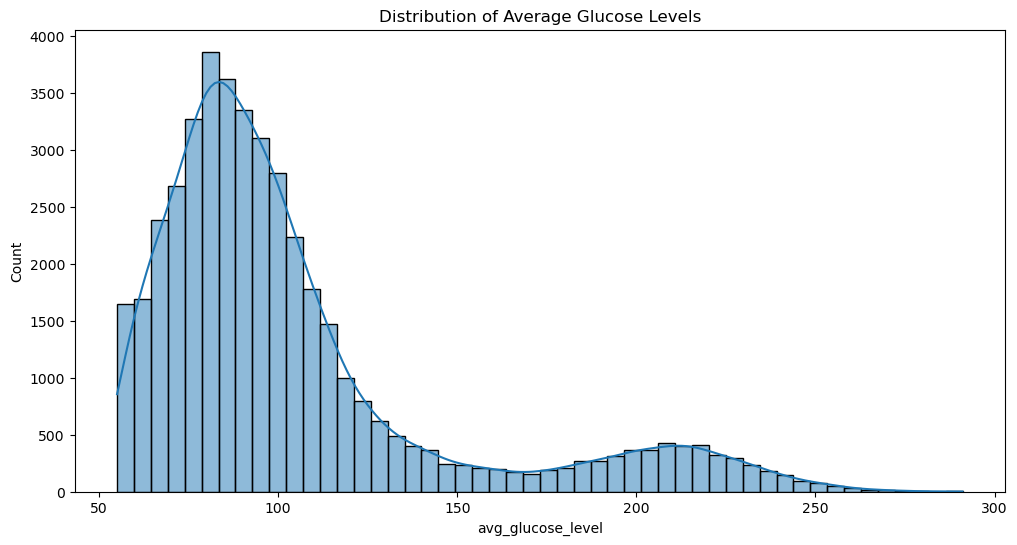

In [37]:
# Check for the distribution of avergae glucose level for better visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['avg_glucose_level'], bins=50, kde=True)
plt.title('Distribution of Average Glucose Levels')
plt.show()

*Few have average glucose level much higher may be need to find out whats the medical measure for standard glucose level distribution, clearly shows that the column is having outliers, We need to handle the ouliers to reach to a better conclusin*

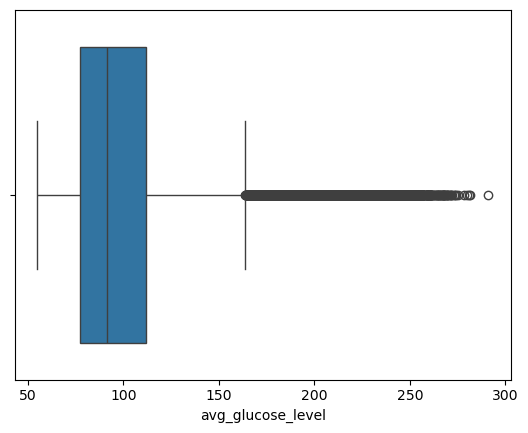

In [38]:
# Will see the box plot for the better visualization of the ouliers
sns.boxplot(x=df['avg_glucose_level'])
plt.show()

*Unexpected large ammount of outliers in the data set, can't make a conclusion will try to fix the outliers so that we can get some insights*

In [39]:
# Since i have noticed some outliers are with extreme values so handling the Cap extreme outliers 
upper_limit = df['avg_glucose_level'].quantile(0.99)
df['avg_glucose_capped'] = df['avg_glucose_level'].clip(upper=upper_limit)

In [40]:
# For data analysis will use log transformation to handle the outliers
df['log_glucose'] = np.log1p(df['avg_glucose_level'])

In [41]:
# Creating a new column in which categorizing the types persopn based on their glucose level
# Considering standard values for categorization taken from Google.
# In this dividing them on the basis of Low, normal, Prediabiates, Diabetes.

def categorize_glucose(level):
    if level < 70:
        return 'Low'
    elif 70 <= level < 100:
        return 'Normal'
    elif 100 <= level < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['glucose_category'] = df['avg_glucose_level'].apply(categorize_glucose)

*So as per the medical data i have classified the data into categories of people where less than 70 means low glucose level, if its between 70-100 its normal , and if its between 100 to 126 its Prediabetes and if more than 126 its a diabties*

*Bmi*

In [42]:
df["bmi"].unique()

array([18. , 39.2, 17.6, 35.9, 19.1, 50.1, 17.7, 27. , 32.3, 54.6, 35. ,
       22. , 39.4, 26.1, 42.4, 33. , 19.7, 22.5, 24.6, 25.2, 41.8, 60.9,
       31.5, 27.3, 23.7, 24.5, 28.4, 26.9, 26.7, 31.2, 25. , 25.4, 27.5,
       16. , 31.6, 25.1, 30.9, 24.8, 23.4, 29.4, 18.3, 20. , 19.5, 36. ,
       27.7, 28.5, 26.8, 33.6, 29.1, 34.9, 35.3, 26.4, 40.1, 43.1, 36.7,
       29.3, 21.2, 36.6, 21.4, 27.9, 34.3, 31. , 38.7, 27.6, 16.5, 22.8,
       35.4, 24.3, 25.7, 21.9,  nan, 38.4, 30.5, 25.9, 54.7, 29.9, 18.6,
       27.1, 24.9, 19.4, 29. , 48.2, 34.6, 25.8, 27.2, 20.7, 30. , 37.3,
       34.1, 23.6, 39.5, 23.5, 23.3, 64.8, 28.1, 24.4, 29.8, 35.1, 43.6,
       21. , 47.3, 16.6, 37.5, 24.2, 21.6, 31.1, 15.5, 20.5, 35.6, 16.7,
       41.9, 16.4, 17.1, 29.2, 37.9, 32.5, 44.6, 33.2, 22.3, 39.6, 37.8,
       40.3, 41.5, 41.6, 23.8, 39. , 23.2, 18.9, 36.1, 36.3, 40.5, 46.5,
       16.8, 46.6, 26.2, 35.2, 20.9, 36.8, 34.4, 22.2, 13.8, 31.7, 34.2,
       36.9, 31.9, 31.8, 29.5, 28.8, 28.9, 15.3, 37

In [43]:
df["bmi"].value_counts()

bmi
27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
59.1      1
64.0      1
56.1      1
56.9      1
89.0      1
Name: count, Length: 555, dtype: int64

*Since i observed some of the missing values in it so handling the missing values in BMI colummn*

In [44]:
# Checking the missing values in the bmi column just for confirmation
df['bmi'].isnull().sum()

1462

*Ok so 1462 data are missing, now need to figure out which measure will work best for handling the missing values*

In [45]:
# Will check the skewness to know weather its right skewed or lefr skewed 
df['bmi'].skew()

0.8987282500249906

*Not much skeweness, but slightly right skewed*

<Axes: xlabel='bmi'>

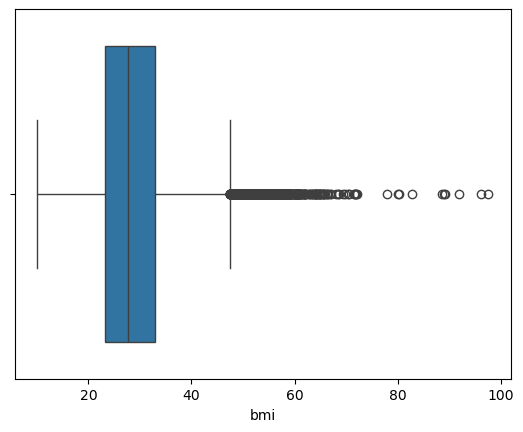

In [46]:
# Need to check for the outliers using box plot
sns.boxplot(data = df, x = "bmi")

*So there are outliers so mean will not be a good option for the tratement of the missing values , will proceed with the median as its roboust to the outliers, but still need to check the distribution of the column*

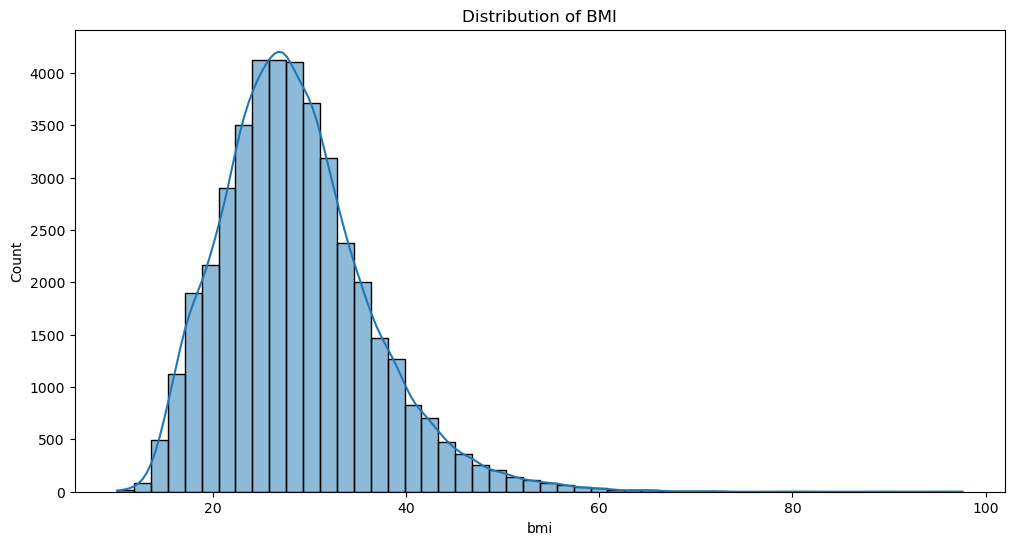

In [47]:
# Check for the distribution of BMI for better visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], bins=50, kde=True)
plt.title('Distribution of BMI')
plt.show()

*Not much right tail, But still right tail as guessed so finally median will work best for this*

In [48]:
# Tratement for the missing values
df["bmi"] = df["bmi"].fillna (df["bmi"]. median ( ) )

*now since the missing vales are being treated can move to the descriptive stats for better insights*

In [49]:
# Descriptive statistics for BMI
df["bmi"].describe()

count    43400.000000
mean        28.574551
std          7.639769
min         10.100000
25%         23.400000
50%         27.700000
75%         32.600000
max         97.600000
Name: bmi, dtype: float64

*From the body mass index data we can clearly see that min is 10, which means few are under weight, and max = 97 , menans few are overweight, making decesions based on the BMI calculator*

In [50]:
# Cap at 99th percentile (preserves most data while handling extremes)
# Making a new column, as i dont want to disturn the origninal BMI column may be of some use in future.

upper_limit = df['bmi'].quantile(0.99)
lower_limit = df['bmi'].quantile(0.01)  # Also cap very low values
df['bmi_capped'] = df['bmi'].clip(lower=lower_limit, upper=upper_limit)

In [51]:
df['bmi_capped'].skew()

0.6683684148318105

*Looks good from earlier, the skewness clearly shows some are underweight and overweight , may be need to categorize them for a better insight*

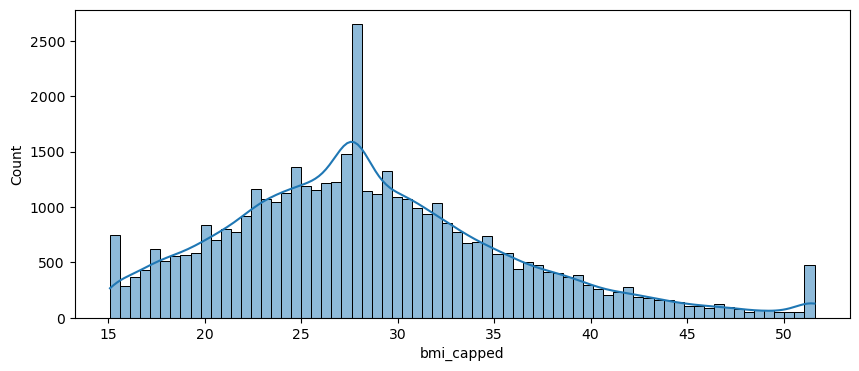

In [52]:
plt.figure(figsize=(10,4))
sns.histplot(df['bmi_capped'], kde=True)
plt.show()

*Assumption confirmed from the visualization that few are under weight while some are over weight*

<Axes: xlabel='bmi_capped'>

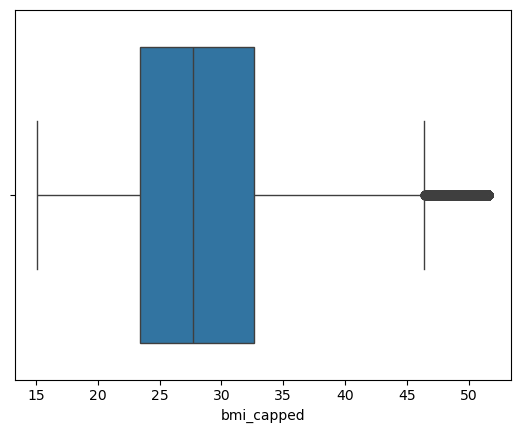

In [53]:
# Just for saftely need to check for the outliers in case if i missed something.
sns.boxplot(data = df, x = "bmi_capped")

In [54]:
# Checking what is number of unfit people under and over weight
print("Values >40:", df[df['bmi_capped'] > 40].shape[0])
print("Values <16:", df[df['bmi_capped'] < 16].shape[0])

Values >40: 3252
Values <16: 901


*As expected most are overweight and a good number in underweight, now need to categorize them for better insights*

In [55]:
# Categorizing them on the basis of BMI calculator.
df['bmi_category'] = pd.cut(df['bmi'],
                           bins=[0, 16, 18.5, 25, 30, 40, 100],
                           labels=['Severe Thinness', 'Underweight', 'Normal', 
                                   'Overweight', 'Obese I-II', 'Obese III'],
                           include_lowest=True)

*Smoking Status*

In [56]:
df["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

*Found few missing values, since its a categorical column will prefer median for the treatement of the missing values*

In [57]:
df["smoking_status"].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [58]:
df["smoking_status"] = df["smoking_status"].fillna (df["smoking_status"]. mode( ) [0] )

*stoke*

In [59]:
df["stroke"].unique()

array([0, 1], dtype=int64)

In [60]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

*Age_months*

### *Data Cleaning*

In [61]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_months', 'avg_glucose_capped',
       'log_glucose', 'glucose_category', 'bmi_capped', 'bmi_category'],
      dtype='object')

In [62]:
df.drop(['id', 'avg_glucose_capped', 'bmi_capped'], axis=1, inplace=True)

In [63]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_months', 'log_glucose',
       'glucose_category', 'bmi_category'],
      dtype='object')

### *Feature Enginerring*

In [64]:
# Creating a new age group column for better insights.
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 30, 45, 60, 75, 100], 
                         labels=['Child', 'Youth', 'Adult', 'Middle-aged', 'Senior', 'Elderly'])

In [65]:
# Combines hypertension & heart disease to flag patients with compounded health risks
df['health_risk'] = df.apply(lambda row: 'High' if row['hypertension'] == 'Yes' and row['heart_disease'] == 'Yes'
                             else 'Moderate' if row['hypertension'] == 'Yes' or row['heart_disease'] == 'Yes'
                             else 'Low', axis=1)

In [66]:
# Merges smoking & work type to highlight high-risk lifestyle patterns influencing stroke.
df['lifestyle_risk'] = df.apply(lambda row: 'High' if row['smoking_status'] != 'never smoked' and row['work_type'] in ['Private', 'Self-employed']
                                else 'Moderate' if row['smoking_status'] != 'never smoked'
                                else 'Low', axis=1)

In [67]:
# Could reveal rural vs urban exposure effects
df['residence_smoking_combo'] = df['Residence_type'] + ' - ' + df['smoking_status']

In [68]:
# Family status + maturity could influence stress-related stroke risk
df['married_age_group'] = df['ever_married'] + ' - ' + df['age_group'].astype(str)

In [70]:
continuous = ["age", "age_months", "avg_glucose_level","log_glucose","bmi"]
categorical = ["gender","hypertension","heart_disease", "ever_married", "work_type",
              "Residence_type", "smoking_status", "stroke", "glucose_category", "bmi_category",
              "age_group", "health_risk", "lifestyle_risk", "residence_smoking_combo", "married_age_group"]

### *Data Analysis*

#### *Age Group Vs Stoke*

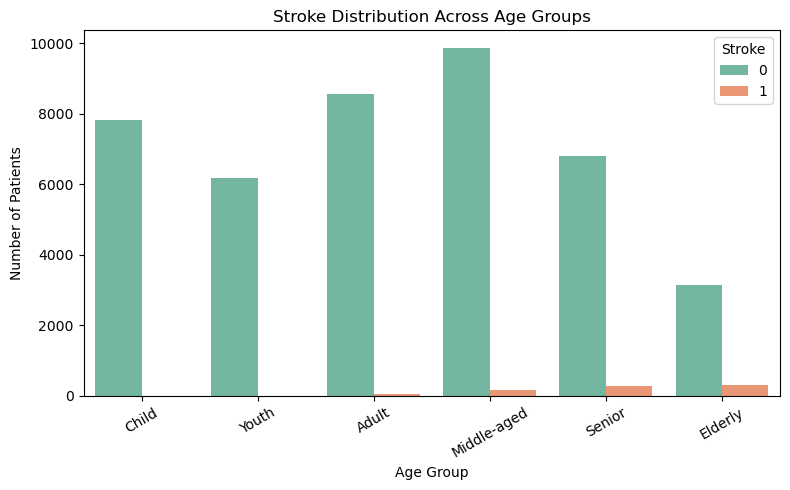

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', hue='stroke', data=df, palette='Set2')
plt.title('Stroke Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Stroke')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- The incidence of stroke (represented by the orange bars) increases notably with age, being highest among the 'Elderly' and 'Senior' groups.
- Despite having fewer patients overall, the 'Elderly' group shows a relatively higher proportion of stroke cases compared to younger age groups.
- The 'Child' and 'Youth' groups have minimal stroke occurrences, indicating stroke is predominantly a concern for older populations.

In [72]:
stroke_by_age = df.groupby('age_group')['stroke'].mean().reset_index()
stroke_by_age['stroke'] = stroke_by_age['stroke'] * 100  # convert to %
stroke_by_age.columns = ['Age Group', 'Stroke Rate (%)']
print(stroke_by_age)

     Age Group  Stroke Rate (%)
0        Child         0.025572
1        Youth         0.032274
2        Adult         0.475914
3  Middle-aged         1.583981
4       Senior         3.901060
5      Elderly         8.818393


- Stroke risk increases sharply with age.
- Adults show early signs (0.47%), while Seniors and Elderly face the highest risk (3.9%–8.8%).
- Targeted interventions are essential for Middle-aged and older groups.

#### *Gender vs Stoke*

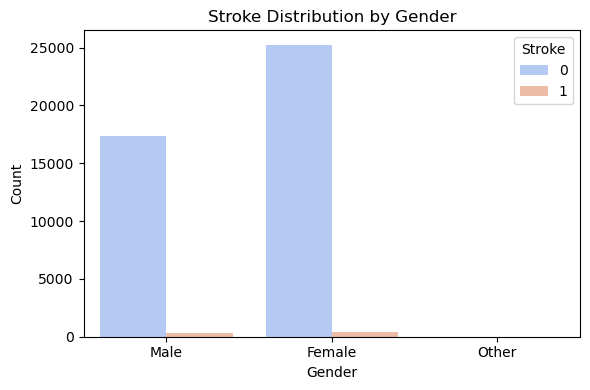

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='stroke', data=df, palette='coolwarm')
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

- Both males and females have reported stroke cases, but females have a slightly higher absolute number of cases, likely due to a larger overall population.
- The 'Other' gender category shows negligible or no cases, possibly due to very low representation.
- The proportion of stroke cases to non-stroke cases appears relatively similar between males and females.

#### *Smoking Status Vs Stoke*

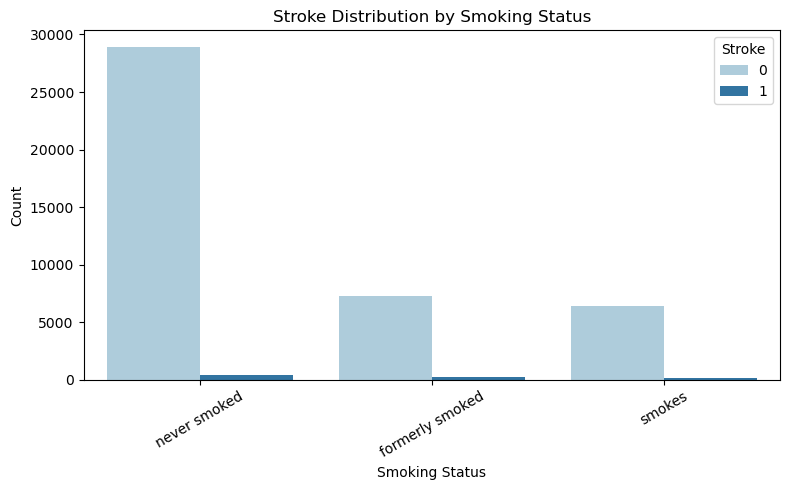

In [74]:
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='Paired')
plt.title('Stroke Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- Individuals who 'never smoked' make up the largest group, but still report a noticeable number of stroke cases.
- Both 'formerly smoked' and 'smokes' categories have smaller populations, yet the proportion of stroke cases appears slightly higher than the 'never smoked' group.
- This suggests a potential association between smoking (current or past) and increased stroke risk.

#### *Hypertension vs stoke*

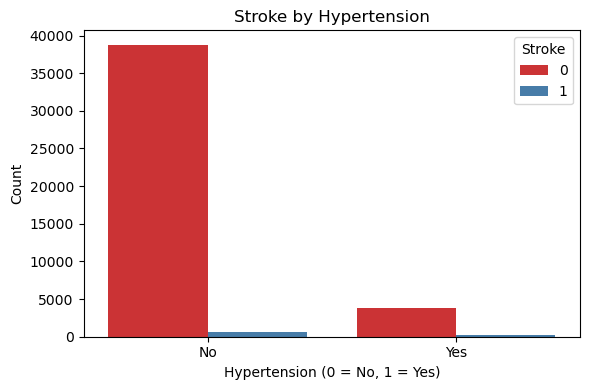

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='Set1')
plt.title('Stroke by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

- Patients with hypertension show a noticeably higher proportion of stroke cases compared to those without hypertension.

#### *Stroke Rate (%)*

In [76]:
df.groupby('hypertension')['stroke'].mean().mul(100).reset_index(name='Stroke Rate (%)')

,hypertension,Stroke Rate (%)
0,No,1.481990
1,Yes,4.924895


The stroke rate among patients with hypertension (4.92%) is significantly higher than those without hypertension (1.48%), indicating hypertension as a strong risk factor for stroke.

#### *Heart Disease vs Stoke*

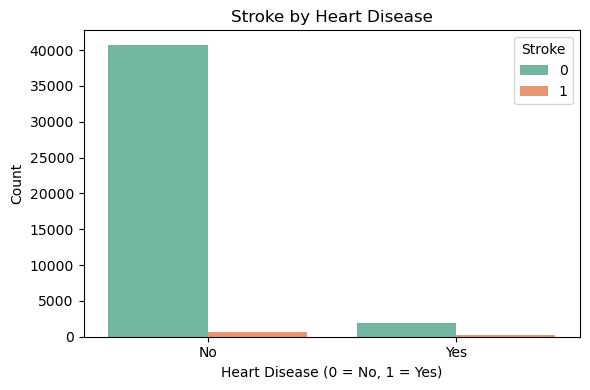

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', hue='stroke', data=df, palette='Set2')
plt.title('Stroke by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

Patients with heart disease have a visibly higher proportion of stroke cases compared to those without heart disease.

#### *Stroke Rate (%)*

In [78]:
df.groupby('heart_disease')['stroke'].mean().mul(100).reset_index(name='Stroke Rate (%)')

,heart_disease,Stroke Rate (%)
0,No,1.465964
1,Yes,8.583899


The stroke rate is significantly higher in patients with heart disease (8.58%) compared to those without heart disease (1.47%), highlighting heart disease as a major stroke risk factor.

#### *Health risk vs stoke*

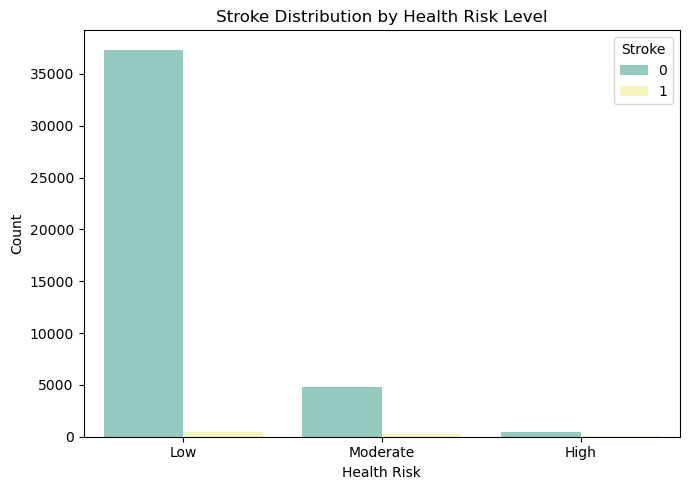

In [79]:
plt.figure(figsize=(7, 5))
sns.countplot(x='health_risk', hue='stroke', data=df, palette='Set3')
plt.title('Stroke Distribution by Health Risk Level')
plt.xlabel('Health Risk')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

- Low risk group has the highest population, but a relatively low stroke occurrence.
- Moderate risk group has fewer individuals, but the proportion of strokes seems to increase.
- High risk group, while the smallest in population, has a visibly higher proportion of strokes compared to its size.
- This indicates that as the health risk level increases, the relative stroke occurrence also increases, which aligns with expectations.

#### *Stroke Rate (%)*

In [80]:
df.groupby('health_risk')['stroke'].mean().mul(100).reset_index(name='Stroke Rate (%)')

,health_risk,Stroke Rate (%)
0,High,10.097087
1,Low,1.211897
2,Moderate,5.360298


- Individuals in the High health risk category have the highest stroke rate (10.1%), which is significantly above the others.
- Moderate risk individuals also show an elevated stroke rate (5.36%).
- Low-risk individuals have the lowest stroke rate (1.21%), but due to their larger population size, they might still account for many cases in absolute terms.

#### *Bmi category vs Stoke*

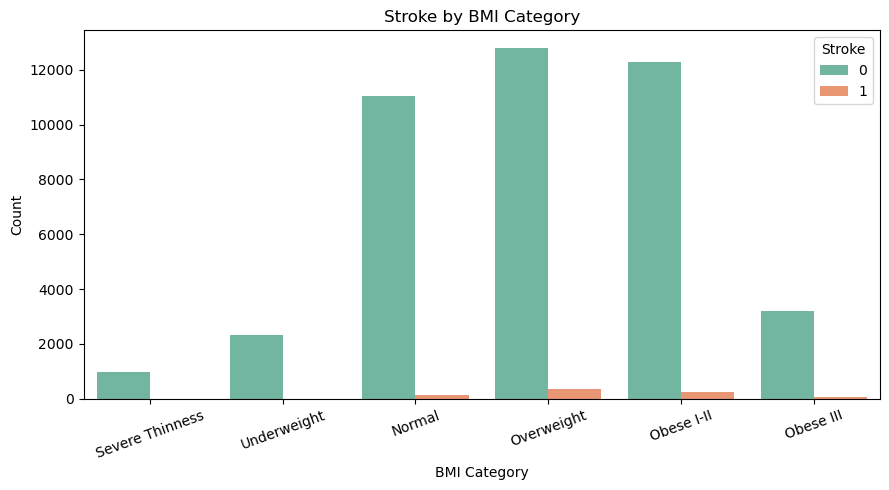

In [81]:
plt.figure(figsize=(9, 5))
sns.countplot(x='bmi_category', hue='stroke', data=df, palette='Set2')
plt.title('Stroke by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

- Overweight and Obese I-II categories have relatively higher stroke counts compared to other BMI groups.
- Normal weight also has some stroke cases, but lower in proportion to the population size.
- Severe Thinness and Underweight categories have the lowest stroke occurrences, though their overall population is also smaller.

#### *Stroke Rate (%) by BMI Category*

In [82]:
stroke_by_bmi = df.groupby('bmi_category')['stroke'].mean().reset_index()
stroke_by_bmi['stroke'] = stroke_by_bmi['stroke'] * 100
stroke_by_bmi.columns = ['BMI Category', 'Stroke Rate (%)']
print(stroke_by_bmi)

      BMI Category  Stroke Rate (%)
0  Severe Thinness         0.413223
1      Underweight         0.172265
2           Normal         1.147262
3       Overweight         2.786425
4       Obese I-II         1.859537
5        Obese III         1.445264


- Stroke risk rises with BMI, peaking in the Overweight group (2.78%).
- Surprisingly, Obese I–III categories show slightly lower stroke rates than Overweight.
- Normal BMI group also has notable stroke cases, indicating BMI alone isn't the only risk driver.

#### *Residence Type vs Stoke*

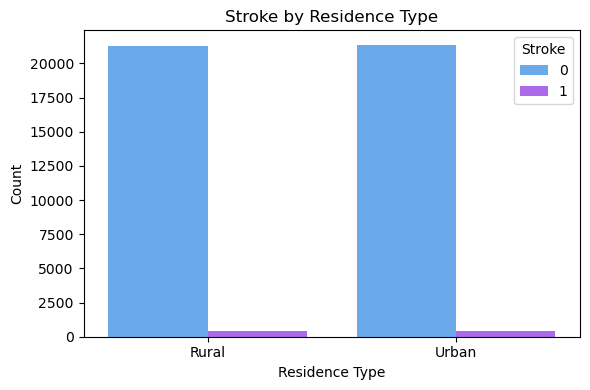

In [83]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Residence_type', hue='stroke', data=df, palette='cool')
plt.title('Stroke by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

#### *Stoke (%) by Residence type*

In [84]:
stroke_by_residence = df.groupby('Residence_type')['stroke'].mean().reset_index()
stroke_by_residence['stroke'] = stroke_by_residence['stroke'] * 100
stroke_by_residence.columns = ['Residence Type', 'Stroke Rate (%)']
print(stroke_by_residence)

  Residence Type  Stroke Rate (%)
0          Rural         1.774164
1          Urban         1.833977


- Stroke rates are slightly higher in Urban areas (1.83%) than Rural (1.77%).
- The difference is minimal, suggesting residence alone isn't a strong predictor.
- Deeper insights may emerge when combined with lifestyle or demographic factors.

#### *Lifestyle risk vs stoke*

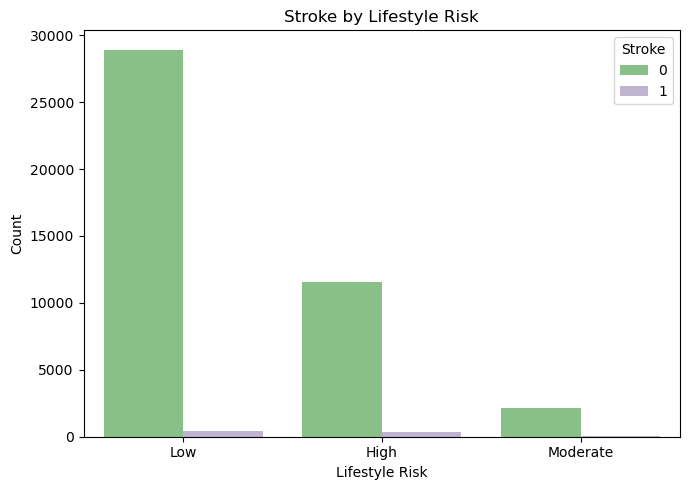

In [85]:
plt.figure(figsize=(7, 5))
sns.countplot(x='lifestyle_risk', hue='stroke', data=df, palette='Accent')
plt.title('Stroke by Lifestyle Risk')
plt.xlabel('Lifestyle Risk')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

#### *Stoke (%)*

In [86]:
df.groupby('lifestyle_risk')['stroke'].mean().mul(100).reset_index(name='Stroke Rate (%)')

,lifestyle_risk,Stroke Rate (%)
0,High,2.678797
1,Low,1.461919
2,Moderate,1.648352


- High lifestyle risk group shows the highest stroke rate at 2.67%.
- Moderate and Low risk groups have significantly lower stroke rates (~1.6% and ~1.4%).
- This confirms that lifestyle habits are a key contributor to stroke risk.

#### *Work Type vs Stoke*

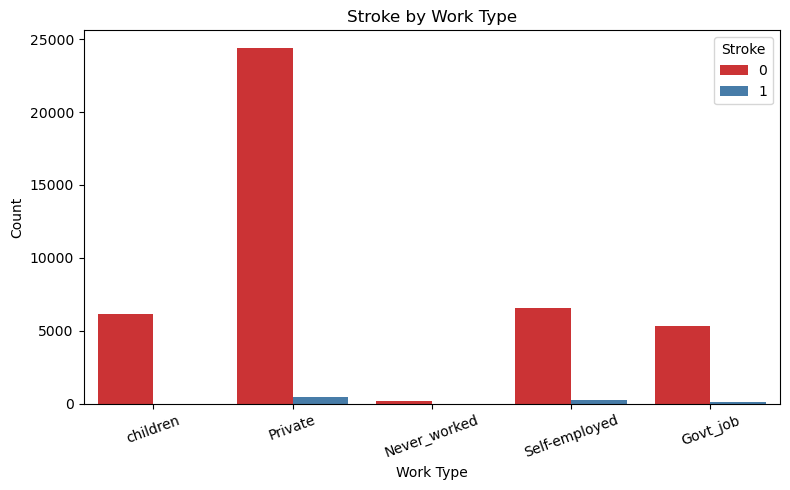

In [87]:
plt.figure(figsize=(8, 5))
sns.countplot(x='work_type', hue='stroke', data=df, palette='Set1')
plt.title('Stroke by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#### *Stoke Rate (%)*

In [88]:
df.groupby('work_type')['stroke'].mean().mul(100).reset_index(name='Stroke Rate (%)')

,work_type,Stroke Rate (%)
0,Govt_job,1.636029
1,Never_worked,0.000000
2,Private,1.775791
3,Self-employed,3.694980
4,children,0.032489


- Self-employed individuals show the highest stroke rate (3.69%), indicating possible lifestyle or stress factors.
- Private and Govt. job sectors have moderate stroke rates (~1.6%–1.7%).
- Children and Never Worked groups show minimal to zero stroke risk, as expected.

#### *Residence Smoking combo Vs Stoke*

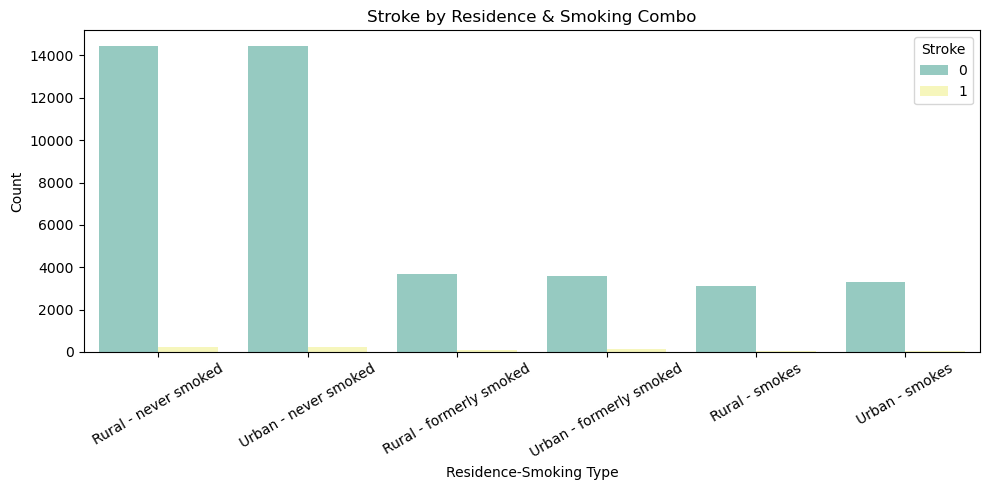

In [89]:
plt.figure(figsize=(10, 5))
sns.countplot(x='residence_smoking_combo', hue='stroke', data=df, palette='Set3')
plt.title('Stroke by Residence & Smoking Combo')
plt.xlabel('Residence-Smoking Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### *Stoke Rate (%)*

In [90]:
df.groupby('residence_smoking_combo')['stroke'].mean().mul(100).reset_index(name='Stroke Rate (%)')

,residence_smoking_combo,Stroke Rate (%)
0,Rural - formerly smoked,2.730647
1,Rural - never smoked,1.445422
2,Rural - smokes,2.152886
3,Urban - formerly smoked,3.171191
4,Urban - never smoked,1.478403
5,Urban - smokes,1.906464


- Urban - formerly smoked group has the highest stroke rate (3.17%), followed by Rural - formerly smoked (2.73%).
- Current smokers in both areas also show elevated risk (~1.9%–2.1%).
- Those who never smoked have the lowest stroke rates, reinforcing smoking as a key risk factor.

#### *Correlation Heatmap for numeric variables related to stoke*

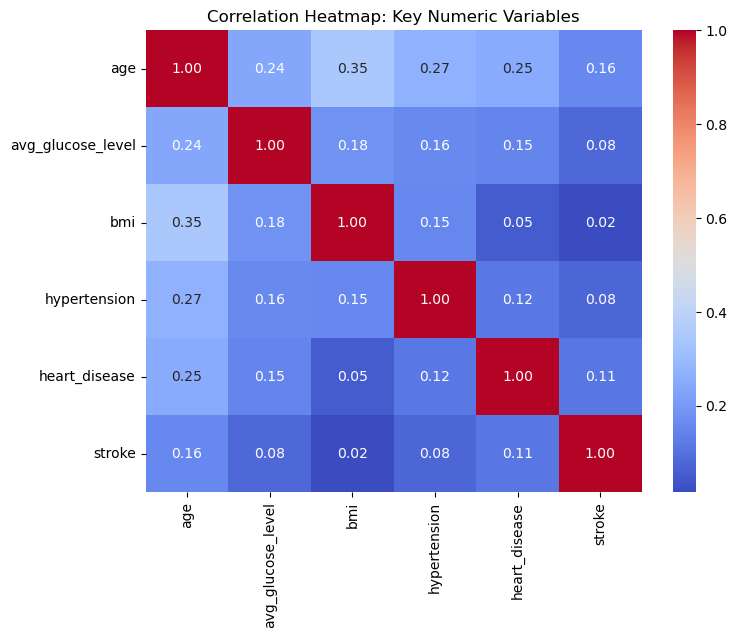

In [91]:
df_corr = df.copy()
binary_map = {'Yes': 1, 'No': 0}

for col in ['hypertension', 'heart_disease']:
    df_corr[col] = df_corr[col].map(binary_map)

# Now calculate correlation on numeric columns
num_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
corr = df_corr[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Key Numeric Variables')
plt.show()

#### *stoke rate by age group and Hypertension (piviot table + Heatmap)*

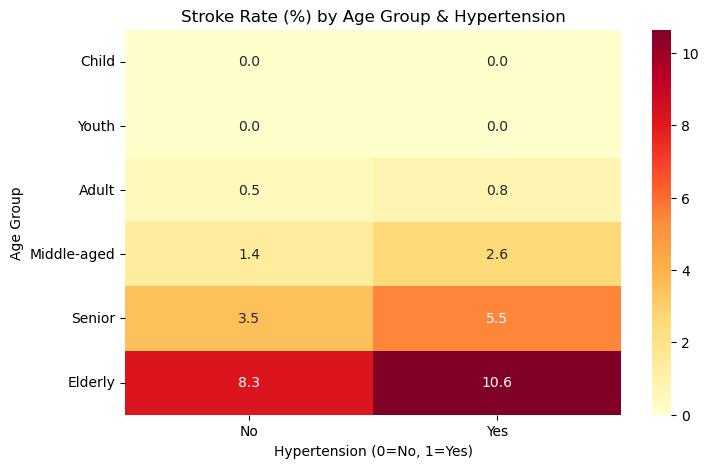

In [92]:
pivot = df.pivot_table(index='age_group', columns='hypertension', values='stroke', aggfunc='mean') * 100

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Stroke Rate (%) by Age Group & Hypertension')
plt.xlabel('Hypertension (0=No, 1=Yes)')
plt.ylabel('Age Group')
plt.show()

#### *stoke Rate by Gender and Smoking Status* 

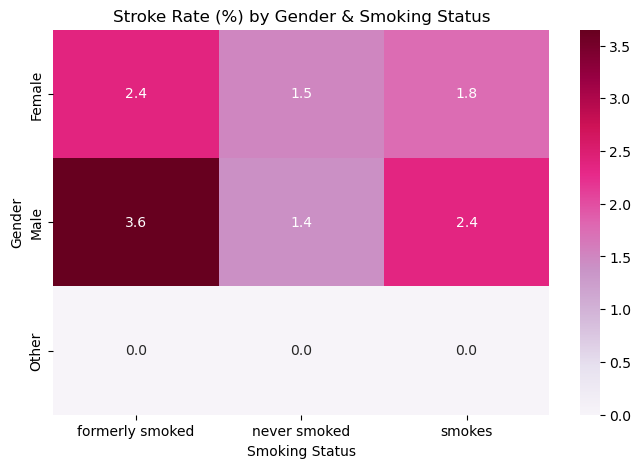

In [93]:
pivot2 = df.pivot_table(index='gender', columns='smoking_status', values='stroke', aggfunc='mean') * 100

plt.figure(figsize=(8, 5))
sns.heatmap(pivot2, annot=True, fmt='.1f', cmap='PuRd')
plt.title('Stroke Rate (%) by Gender & Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Gender')
plt.show()

In [94]:
df.to_csv('cleaned_stroke_data.csv', index=False)